# Modelo de Kermack McKendrick

hola

In [80]:
include("Taylor.jl")
using ADT

Las ecuaciones diferenciales que rigen el modelo para una especie son:

$$ \frac{dS}{dt} = -\beta SI$$
$$ \frac{dI}{dt} = \beta SI - \gamma I $$
$$ \frac{dR}{dt} = \gamma I $$
donde $S$ es el número de individuos suceptibles, $I$ el de individuos infectados y $R$ el de recuperados; así como $\beta$ es la tasa de transmisión de la infección y $\gamma$ la tasa de recuperación de la especie.

En este modelo NO tomamos en cuenta los nacimientos y muertes, así que para una población fija se tiene que $ N = S(t) + I(t) + R(t)$ en todo tiempo.

In [81]:
function coefs_1(gamma, beta, S0, I0, R0 = 0.0, n = 20)
    s = [S0]
    i = [I0]
    r = [R0]
    
    
    F1(S,I) = -beta*S*I
    F2(I) = gamma*I
    
    for k = 1:n-1
       
        
        Ts = Taylor(s)
        Ti = Taylor(i)
        Tr = Taylor(r)
        
        fs = F1(Ts,Ti) # F1 = -b*S*I
        fr = F2(Ti) # F2 = g*I
        
        fi = -fs -fr # = b*S*I - g*I
        
        S0 = fs.pol[k]/k
        I0 = fi.pol[k]/k
        R0 = fr.pol[k]/k
        
        push!(s,S0)
        push!(r,R0)
        push!(i,I0)
    end
    s = Taylor(s)
    i = Taylor(i)
    r = Taylor(r)
    return s,i,r
        
end

coefs_1 (generic function with 3 methods)

Prueba

In [82]:
N = 1000.;
I0 = 1.;
S0 = N-I0;

@time S,I,R = coefs_2(gamma, beta, S0, I0);

  0.001266 seconds (20.69 k allocations: 386.531 KB)


Error absoluto

In [83]:
eps_abs = 1e-50

1.0e-50

In [84]:
function paso(a::Taylor, p = 20)
    
    while p != 0 && a.pol[p] == 0
       p = p-1;
    end
    
    h = 0.5*(eps_abs/abs(a.pol[p]))^(1/p)
end

paso (generic function with 2 methods)

In [85]:
function ev_horner{T<:Number}(a::Taylor,t0::T)
    
    n = gradomax(a)
    x1 = a.pol[n]
    
    for k = 1:n-1
        x1 = a.pol[n-k] + x1*t0
    end
    return x1
end

ev_horner (generic function with 1 method)

In [86]:
function integrador_kermack(N, I0, t0, tf, gamma, beta)
    R0 = 0.
    S0 = N - I0 - R0
    
    t = [t0]
    s = [S0]
    i = [I0]
    r = [R0]
    
    while t0 < tf
        S,I,R = coefs_1(gamma, beta, S0, I0)
        
        h_s = paso(S)
        h_i = paso(I)
        h_r = paso(R)
        h = min(h_s, h_i, h_r)
        
        t0 += h
        
        S0 = ev_horner(S,h)
        I0 = ev_horner(I,h)
        R0 = ev_horner(R,h)
        
        push!(t,t0)
        push!(s,S0)
        push!(i,I0)
        push!(r,R0)
    end
    return t,s,i,r
end

integrador_kermack (generic function with 1 method)

In [98]:
N = 1.
infectados_iniciales = N/100
t_inicial = 0.
t_final = 160.
beta = 0.2
gamma = 0.05

@time t,s,i,r = integrador_kermack(N, infectados_iniciales, t_inicial, t_final, gamma, beta);

  2.141265 seconds (51.98 M allocations: 949.022 MB, 4.22% gc time)


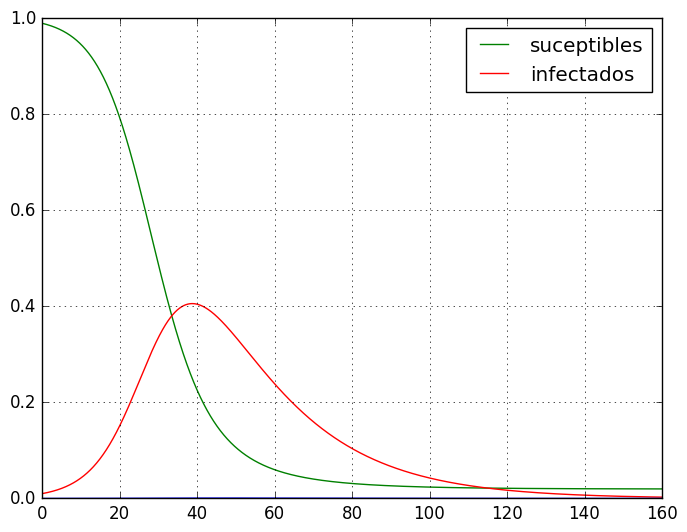

In [100]:
using PyPlot

plot(t,s, color = "green", label = "suceptibles")
plot(t,i, color = "red", label = "infectados")
plot(t,r)
axis([0,160,0,1])
grid()
legend()
show()

In [101]:
length(t)

2509

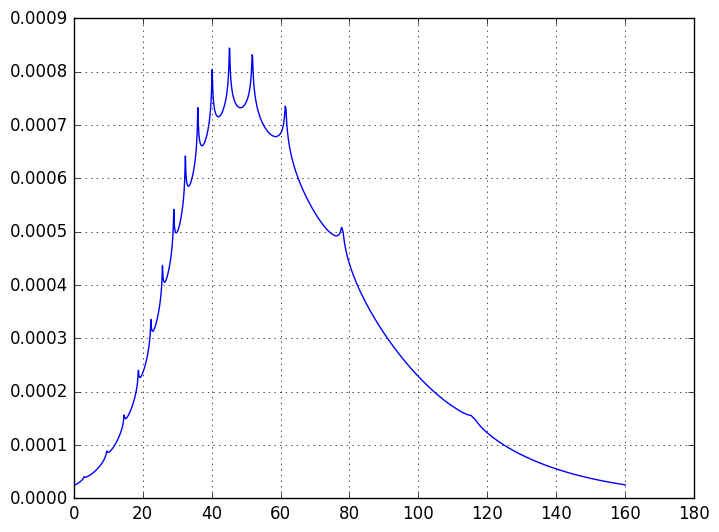

In [92]:
plot(t,r)
grid()

In [93]:
function wtf()
    return "WTF"
end

wtf (generic function with 1 method)

In [94]:
mi_reaccion_ante_la_grafica_de_r = wtf()

"WTF"